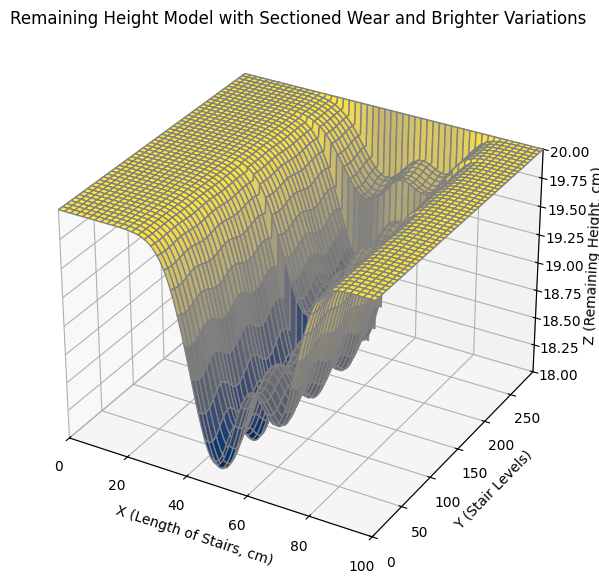

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
H0 = 20  # Base height in cm
A_x1, mu_x1, sigma_x1 = 1.2, 50, 8  # Parameters for first Gaussian
A_x2, mu_x2, sigma_x2 = 0.8, 70, 6  # Parameters for second Gaussian

# Define layer boundaries and wear intensity for each section
low_section = (0, 150)  # Bottom section (most wear)
mid_section = (150, 250)  # Middle section (moderate wear)
top_section = (250, 294)  # Top section (least wear)

def Z_x_sectioned(X, Y):
    """Compute the wear function with section-specific intensity and smoother random variations."""
    # Wear intensity by section
    wear_intensity = np.zeros_like(Y)
    wear_intensity[(Y >= low_section[0]) & (Y < low_section[1])] = 1.5  # High wear
    wear_intensity[(Y >= mid_section[0]) & (Y < mid_section[1])] = 1.0  # Medium wear
    wear_intensity[(Y >= top_section[0]) & (Y < top_section[1])] = 0.5  # Low wear

    # Add smoother random variations to wear intensity
    random_variation = 1 + 0.05 * np.sin(2 * np.pi * Y / 50)  # Increased amplitude for larger variations
    wear_intensity *= random_variation

    # Gaussian wear models with section-specific intensity
    term1 = -A_x1 * wear_intensity * np.exp(-((X - mu_x1) ** 2) / (2 * sigma_x1 ** 2))
    term2 = -A_x2 * wear_intensity * np.exp(-((X - mu_x2) ** 2) / (2 * sigma_x2 ** 2))
    return term1 + term2

def Z_remaining_sectioned(X, Y):
    """Compute the remaining height model with sectioned wear."""
    return H0 + Z_x_sectioned(X, Y)

# Generate layer indices (representing stair levels)
Y_layers = np.linspace(0, 294, 294)  # Total of 294 layers
X, Y = np.meshgrid(np.linspace(0, 100, 200), Y_layers)  # Grid for plotting
Z_sectioned = Z_remaining_sectioned(X, Y)  # Compute sectioned model

# Create a 3D plot with sectioned wear visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_sectioned, cmap='cividis', edgecolor='grey', alpha=0.95)  # Changed edgecolor to 'white'

# Adjust plot limits to remove unnecessary vertical faces
ax.set_xlim([0, 100])  # Full X range
ax.set_ylim([0, 294])  # Full Y range
ax.set_zlim([18, 20])  # Adjust Z range for better clarity

# Add titles and labels
ax.set_title("Remaining Height Model with Sectioned Wear and Brighter Variations")
ax.set_xlabel("X (Length of Stairs, cm)")
ax.set_ylabel("Y (Stair Levels)")
ax.set_zlabel("Z (Remaining Height, cm)")

# Show the plot
plt.show()
